<font size="6px" font color="blue" face="Times New Roman"><b>Aprendizado de Máquina</b></font>

Problemas de aprendizado de máquina consideram um conjundo de $n-$amostras de um conjunto de dados a aprtir do qual se tenta fazer predições em um conjunto de dados não conhecido. Caso cada amostra tenha mais de um número de entrada, ou uma entrada multi-dimensional  ($\href{https://en.wikipedia.org/wiki/Multivariate_random_variable}{VRM}$) é dito possui diversas variáveis ou atributos.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
#################################PACOTES#################################
% matplotlib inline
import numpy as np
from numpy.linalg import inv
import math 
from math import sqrt
import pylab as py
import matplotlib
import matplotlib.pyplot as plt
import random
from random import shuffle
import scipy as sp
from scipy import misc
from IPython.display import Latex
import time
from time import gmtime, strftime, localtime
import datetime
import pickle
#--------------------------------------------------------
from sklearn import datasets
from sklearn import svm
from sklearn import datasets
from sklearn.externals import joblib
from sklearn import random_projection
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
#########################################################################

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<font size="4px" font color="black" face="Times New Roman"><b>Aprendizado não-supervisionado</b></font>

O aprendizado não supervisionado consiste em um conjunto de vetores de entrada $X$ sem qualquer valor correspondente alvo. O objetivo da resolução dessa problemática é descobrir qual é o grupo de exemplos similares dentro do dado, que é chamado de  $\href{https://en.wikipedia.org/wiki/Cluster_analysis}{clusterização}$, ou determinar a distribuição de dados dentro do espaço conhecido como estimativa de densidade, ou projetar o dado de um espaço multi-dimensional para um espaço de duas ou três dimensões para fins de vizualização.

In [2]:
#carregando variáveis
iris = datasets.load_iris()
digits = datasets.load_digits() #dataset é um dicionário de termos. O dado propriamente dito está na extensão .data e na .target

print(digits.data)
print(digits.target)
print(digits.images)


[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]
[[[  0.   0.   5. ...,   1.   0.   0.]
  [  0.   0.  13. ...,  15.   5.   0.]
  [  0.   3.  15. ...,  11.   8.   0.]
  ..., 
  [  0.   4.  11. ...,  12.   7.   0.]
  [  0.   2.  14. ...,  12.   0.   0.]
  [  0.   0.   6. ...,   0.   0.   0.]]

 [[  0.   0.   0. ...,   5.   0.   0.]
  [  0.   0.   0. ...,   9.   0.   0.]
  [  0.   0.   3. ...,   6.   0.   0.]
  ..., 
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   0. ...,  10.   0.   0.]]

 [[  0.   0.   0. ...,  12.   0.   0.]
  [  0.   0.   3. ...,  14.   0.   0.]
  [  0.   0.   8. ...,  16.   0.   0.]
  ..., 
  [  0.   9.  16. ...,   0.   0.   0.]
  [  0.   3.  13. ...,  11.   5.   0.]
  [  0.   0.   0. ...,  16.   9.   0.]]

 ..., 
 [[  0

$\textbf{Aprendizado e predição}$

No caso do conjunto de dados chamado $\textit{digit}$, o problema é predizer uma dada uma imagem qual dígito a representa. São dados amostras de cada uma das $10$ possibilidades de classes (variando do dígito $0$ ao dígito $9$) em cada um são ajustados estimadores afim de prever classes de cada uma das amostras não supervionadas.  


No Scikit-learn, um estimador usado em problemas de classificação é um objeto em Python que implementa os métodos ajuste fit(x,y), e predito predict(T).

Um exemplo de estimador é a classe class sklearn.svm.SVC que implementa a classificação do vetor de suporte ($\href{https://en.wikipedia.org/wiki/Support_vector_machine}{support vector classification}$). A construção de um estimador toma como argumentos os parâmetros do modelo, mas, por enquanto, o estimador será considerado uma caixa preta: 

In [3]:
 clf = svm.SVC(gamma=0.001, C=100.)

O classificador é chamado de clf. E agora precisa ser ajustado ao modelo, ou seja ele deve aprender com o modelo. Isto é feito passando o nosso conjunto de treinamento para o método de ajuste. Como conjuto de treinamento serão usadas todas as imagens do nosso conjunto de dados além do último. Nós selecionamos esse conjunto de treinamento através do comando [:-1], o que produz um novo arrranjo (array) que contém todos mas o última entrada de digits.data:

In [4]:
#Escolhendo os parâmetros do modelo
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Agora pode-se prever valores, em particular podemos fazer o classificador dizer qual é o dígito da nossa última imagem. 

In [5]:
clf.predict(digits.data[-1:])

array([8])

Automatically created module for IPython interactive environment


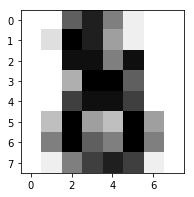

In [10]:
#Plotando a figura predita

print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()



In [7]:
#Modelo de Persistência 

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  


s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

y[0]

0

In [8]:
#####Contagem do Tempo de máquina############
start_time = time.clock()#conta o tempo de processamento baseado no clock do processador
print time.clock() - start_time, "seconds"

0.00021 seconds


In [9]:
strftime("%A, %d %B %Y at %H:%M:%S", localtime())

'Monday, 10 April 2017 at 19:58:42'